## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
print ('shape of training dataset', x_train.shape)
print ('shape of testing dataset',x_test.shape)
print ('Classes of output dataset', y_train.shape)

shape of training dataset (60000, 28, 28)
shape of testing dataset (10000, 28, 28)
Classes of output dataset (60000,)


### Find dimensions of an image in the dataset

In [3]:
import numpy as np
np.bincount(y_train).shape

(10,)

# The above output shows that there are 10 clases in the output dataset

In [4]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [6]:
x_train.dtype

dtype('uint8')

#changing the datatype to float else all values will be 0 except 255

In [0]:
x_train = x_train.astype("float32")/255

In [0]:
x_test = x_test.astype("float32")/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [10]:
x_train[0].shape

(28, 28, 1)

In [0]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
  # Define model
    model2 = Sequential()
    
    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.3717 - acc: 0.8660 - val_loss: 0.2866 - val_acc: 0.8940
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2301 - acc: 0.9150 - val_loss: 0.2610 - val_acc: 0.9079
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1690 - acc: 0.9374 - val_loss: 0.2606 - val_acc: 0.9132
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1200 - acc: 0.9553 - val_loss: 0.2899 - val_acc: 0.9121
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0813 - acc: 0.9693 - val_loss: 0.3056 - val_acc: 0.9103
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0578 - acc: 0.9791 - val_loss: 0.3266 - val_acc: 0.9152
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0389 - acc: 0.9861 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [14]:
    # Define model
    model3 = Sequential()
    
    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))
    
    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model3
    model3.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3986 - acc: 0.8560 - val_loss: 0.2984 - val_acc: 0.8922
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.2593 - acc: 0.9051 - val_loss: 0.2578 - val_acc: 0.9047
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.2101 - acc: 0.9214 - val_loss: 0.2382 - val_acc: 0.9138
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1755 - acc: 0.9347 - val_loss: 0.2134 - val_acc: 0.9217
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1484 - acc: 0.9440 - val_loss: 0.2268 - val_acc: 0.9232
Epoch 6/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1244 - acc: 0.9535 - val_loss: 0.2455 - val_acc: 0.9209
Epoch 7/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1060 - acc: 0.9599 - val_loss: 0.2377 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

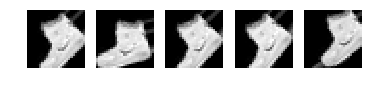

In [16]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [17]:
# Define model
    model4 = Sequential()
    
    # 1st Conv Layer
    model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model4.add(Activation('relu'))

    # 2nd Conv Layer
    model4.add(Convolution2D(32, 3, 3))
    model4.add(Activation('relu'))

    # Max Pooling
    model4.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model4.add(Dropout(0.25))
    
    # Fully Connected Layer
    model4.add(Flatten())
    model4.add(Dense(128))
    model4.add(Activation('relu'))

    # Prediction Layer
    model4.add(Dense(10))
    model4.add(Activation('softmax'))

    # Loss and Optimizer
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model4
    model4.fit_generator(datagen.flow(x_train, y_train, 
                         batch_size=32),
                         samples_per_epoch=x_train.shape[0],
                         nb_epoch=10, 
                         validation_data=(x_test, y_test), callbacks=callback_list)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validat

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.8072 - acc: 0.6975 - val_loss: 0.5875 - val_acc: 0.7848
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5888 - acc: 0.7777 - val_loss: 0.5161 - val_acc: 0.8081
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5221 - acc: 0.8060 - val_loss: 0.4494 - val_acc: 0.8370
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4818 - acc: 0.8198 - val_loss: 0.4311 - val_acc: 0.8466
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4576 - acc: 0.8291 - val_loss: 0.4242 - val_acc: 0.8500
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4357 - acc: 0.8369 - val_loss: 0.3952 - val_acc: 0.8580
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4188 - acc: 0.8436 - val_loss: 0.3861 - val_acc: 0.8610
Epoch 8/10
1875/1875 [==============================

###  Report the final train and validation accuracy

In [20]:
model4.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 51us/step


[0.34827739075422287, 0.871]